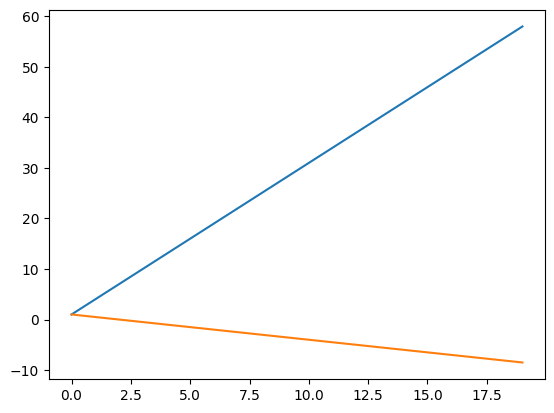

In [11]:
# 1
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
def get_line(m, a, min=0, max=20):
    x = np.arange(min, max)
    y = m*x+a
    return x, y
# 1 + 3X1 - X2 = 0
# X1 = x, X2 = y
# y = 3x + 1
xa, ya = get_line(3, 1)
# -2 + x1 + 2x2 = 0 <=> 2y = -x + 2 <=> y = (-1/2)*x + 1
xb, yb = get_line(-1/2, 1)
plt.plot(xa, ya)
plt.plot(xb, yb)
plt.show()
# im not drawing the decision regions fuck you
# guess what one of them is on one side of the line. and guess what, the other is on the *other* side of the line

Red if 0.9997070312500025 + (-1.9994140625000014)x1 + 1.9994140625000014x2 > 0, blue otherwise


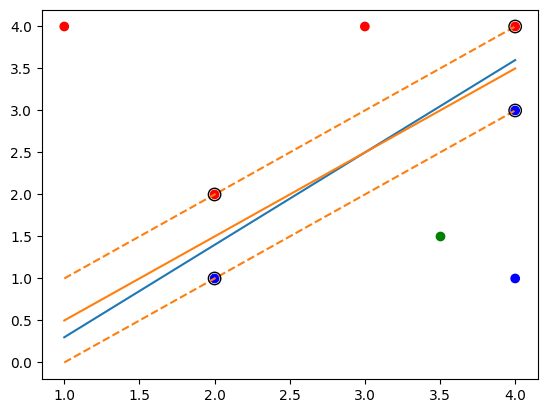

In [82]:
# 2
X = np.array([
    [3, 4],
    [2, 2],
    [4, 4],
    [1, 4],
    [2, 1],
    [4, 3],
    [4, 1]
])
y = np.array([ # red =-1, blue = 0
    1, 1, 1, 1, 0, 0, 0
])

# Plot observations
plt.scatter(X[:,0], X[:,1], c=np.where(y == 1, 'red', 'blue'))
# Sketch hyperplane (manual)
xm, ym = get_line(1.1, -.8, 1, 5)
plt.plot(xm, ym, c='C0') # blue-ish
# Optimal hyperplane
from sklearn import svm
clf = svm.SVC(kernel="linear", C=99999999999999999).fit(X, y)
# print(clf.coef_, clf.intercept_)
# coef_[0]x1 + coef_[1]x2 + intercept_ = 0 <=> y = (-coef_[0]/coef_[1])*x + (-intercept_ / coef_[1])
xa, xb = get_line((-clf.coef_[:,0][0]/clf.coef_[:,1][0]), (-clf.intercept_[0] / clf.coef_[:,1][0]), 1, 5)
plt.plot(xa, xb, c='C1') # yellow-ish
# rule
print(f"Red if {clf.intercept_[0]} + ({clf.coef_[:,0][0]})x1 + {clf.coef_[:,1][0]}x2 > 0, blue otherwise")
# "indicate the margin" stolen from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(1, 4)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
# plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "C1--")
plt.plot(xx, yy_up, "C1--")
plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k"
    )
# The support vectors are the ones with circles
# A slight movement of the seventh observation would, in fact, not change the line.
#  This is because it is not a support vector.
# I already sketched a hyperplane it's the blue one
# I'll make the extra observation green but imagine that it's red
plt.scatter([3.5], [1.5], c='green')
plt.show()

In [ ]:
# i'm done for today this is boring